In [1]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy.stats.mstats import gmean
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools 
import scipy.stats
import statistics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import chi2


In [2]:
def barPlot_func(valueY1, valueY2, varLabels, plot_name):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    ax.set_ylabel('Scores')
    ax.set_title(plot_name)
    r = np.arange(len(varLabels))
    width = 0.30


    ax.bar(r, valueY1, color = 'b',
        width = width,
        label='FBpop_tot')
    ax.bar(r+width, valueY2, color = 'g',
        width = width,
     label='mov_tot')

    plt.xticks(r + width/2, varLabels)
    plt.xticks(rotation=90)
    plt.legend()

    plt.xlabel('Variables')
    plt.ylabel('Target Score')
    plt.show()

    
def barPlot_func_onedata(valueY1, varLabels, plot_name):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])

    ax.set_ylabel('Scores')
    ax.set_title(plot_name)
    r = np.arange(len(varLabels))
    width = 0.75


    ax.bar(r, valueY1, color = 'b',
        width = width,
        )

    plt.xticks(r + width/2, varLabels)
    plt.xticks(rotation=90)

    plt.xlabel('Variables')
    plt.ylabel('Dispersion Ratio')
    plt.show()


In [3]:
#read data from csv 
data = pd.read_csv('table.csv')

langs = ['pop', 'dusaf', 'rete_fer', 'autostrad', 
                                 'strade_pri', 'strade_sec', 'h_mean','st_ferrov',
                                 'st_metro','int_prim','int_prim_s','int_sec','scn','dsf11',
                                 'dsf12','dsf13','dsf14','dsf2','dsf3','dsf4','dsf5','dsfSum']


# preprocessing of data before Regression Feature Selection
X  = pd.DataFrame(data, columns = langs)
y1 = pd.DataFrame(data, columns= ['FBpop_tot'])
y2 = pd.DataFrame(data, columns= ['mov_tot'])


y1 = y1.values.ravel()
y2 = y2.values.ravel()


X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.33, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.33, random_state=1)


# define feature selection
fs1 = SelectKBest(score_func=f_regression, k='all')
fs2 = SelectKBest(score_func=f_regression, k='all')


# learn relationship from training data 
fs1.fit(X_train1, y_train1)
fs2.fit(X_train2, y_train2)

# transform train input data
X_train_fs1 = fs1.transform(X_train1)
X_train_fs2 = fs2.transform(X_train2)

# transform test input data
X_test_fs1 = fs1.transform(X_test1)
X_test_fs2 = fs2.transform(X_test2)

plot_data = pd.DataFrame({"FBpop_tot":fs1.scores_,
                  "mov_tot":fs2.scores_,
                  "target_variables": langs})

plot_data= plot_data.sort_values(by=['FBpop_tot'], ascending=False)


barPlot_func(plot_data.FBpop_tot, plot_data.mov_tot, plot_data.target_variables,'Target scores with NO Normalization')

for i in range(len(X.columns)):
    print(X.columns[i],': ',fs1.scores_[i], fs2.scores_[i])





KeyboardInterrupt: 

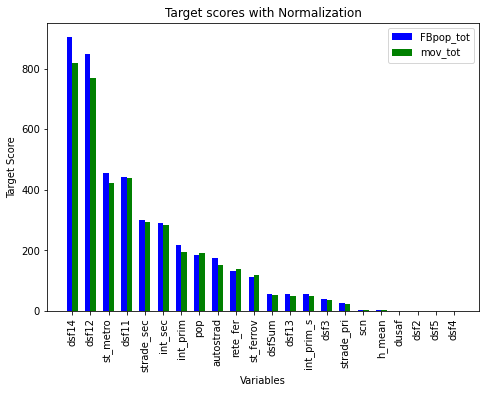

pop :  186.1344296598299 191.45137202813348
dusaf :  1.531716044311531 1.3048570257768055
rete_fer :  132.4678949084991 138.43686490909573
autostrad :  173.54856056663164 151.31805458132328
strade_pri :  25.2199314920465 23.72434910682464
strade_sec :  299.02134211439653 293.95291951762664
h_mean :  2.54140102229934 2.1750765169886694
st_ferrov :  112.97125242906795 117.4253193773189
st_metro :  456.52734431756016 421.78436827184606
int_prim :  216.5860415963104 195.16958806511948
int_prim_s :  54.788639327016185 49.47414105492704
int_sec :  292.2495268354813 285.5824197473864
scn :  4.26568941399889 4.3534055831192005
dsf11 :  441.95199822845257 439.48772759236965
dsf12 :  847.3646473940945 767.8649180292116
dsf13 :  56.16896649155141 48.86457349945614
dsf14 :  905.5728734100356 819.0031727369765
dsf2 :  1.2559874971866205 0.7265630727738742
dsf3 :  40.0110650216621 36.59851120761669
dsf4 :  0.0004003662030231754 0.0014973485774127972
dsf5 :  1.1024604000651925 0.9299758770453376
dsfS

In [5]:


normalized_X = preprocessing.normalize(X)


a = pd.DataFrame(normalized_X, columns=langs)


X_train1, X_test1, y_train1, y_test1 = train_test_split(normalized_X, y1, test_size=0.33, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(normalized_X, y2, test_size=0.33, random_state=1)


# define feature selection
fs1 = SelectKBest(score_func=f_regression, k='all')
fs2 = SelectKBest(score_func=f_regression, k='all')


# learn relationship from training data 
fs1.fit(X_train1, y_train1)
fs2.fit(X_train2, y_train2)

# transform train input data
X_train_fs1 = fs1.transform(X_train1)
X_train_fs2 = fs2.transform(X_train2)

# transform test input data
X_test_fs1 = fs1.transform(X_test1)
X_test_fs2 = fs2.transform(X_test2)


plot_data = pd.DataFrame({"FBpop_tot":fs1.scores_,
                  "mov_tot":fs2.scores_,
                  "target_variables": langs})


plot_data= plot_data.sort_values(by=['FBpop_tot'], ascending=False)


barPlot_func(plot_data.FBpop_tot, plot_data.mov_tot, plot_data.target_variables,'Target scores with Normalization')


for i in range(len(X.columns)):
    print(X.columns[i],': ',fs1.scores_[i], fs2.scores_[i])



    

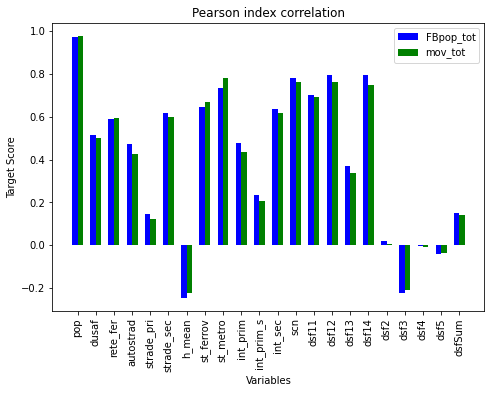

pop :  0.9718136583712809 0.975479047075337
dusaf :  0.515896817407276 0.5015892062910717
rete_fer :  0.5872702627378296 0.5920480752216741
autostrad :  0.47256382982309997 0.42682327956278565
strade_pri :  0.14487578172120918 0.12471372512137235
strade_sec :  0.6155671001666619 0.596746940766581
h_mean :  -0.24582551860637172 -0.22345213899684957
st_ferrov :  0.6431299789160242 0.6696329919435762
st_metro :  0.7358305038125518 0.7789904108214828
int_prim :  0.47653237668197906 0.43565162288622405
int_prim_s :  0.2354763869228885 0.20878922110442852
int_sec :  0.6347277956410862 0.6168323201205081
scn :  0.7805671148501395 0.7613133554084568
dsf11 :  0.7031655584530908 0.6907545491835813
dsf12 :  0.7944140741010243 0.7599048609252403
dsf13 :  0.3715555205083238 0.33872507154398934
dsf14 :  0.7943876223277776 0.7495313699747321
dsf2 :  0.020405519062262643 0.005610515874746114
dsf3 :  -0.22280800602420572 -0.2065457305807276
dsf4 :  -0.005193578163144578 -0.007707230974202486
dsf5 :  -0

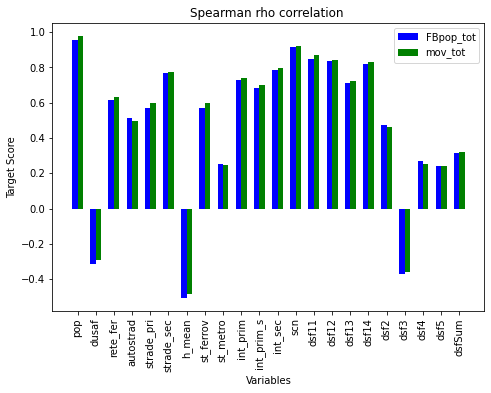

pop :  0.9718136583712809 0.975479047075337
dusaf :  0.515896817407276 0.5015892062910717
rete_fer :  0.5872702627378296 0.5920480752216741
autostrad :  0.47256382982309997 0.42682327956278565
strade_pri :  0.14487578172120918 0.12471372512137235
strade_sec :  0.6155671001666619 0.596746940766581
h_mean :  -0.24582551860637172 -0.22345213899684957
st_ferrov :  0.6431299789160242 0.6696329919435762
st_metro :  0.7358305038125518 0.7789904108214828
int_prim :  0.47653237668197906 0.43565162288622405
int_prim_s :  0.2354763869228885 0.20878922110442852
int_sec :  0.6347277956410862 0.6168323201205081
scn :  0.7805671148501395 0.7613133554084568
dsf11 :  0.7031655584530908 0.6907545491835813
dsf12 :  0.7944140741010243 0.7599048609252403
dsf13 :  0.3715555205083238 0.33872507154398934
dsf14 :  0.7943876223277776 0.7495313699747321
dsf2 :  0.020405519062262643 0.005610515874746114
dsf3 :  -0.22280800602420572 -0.2065457305807276
dsf4 :  -0.005193578163144578 -0.007707230974202486
dsf5 :  -0

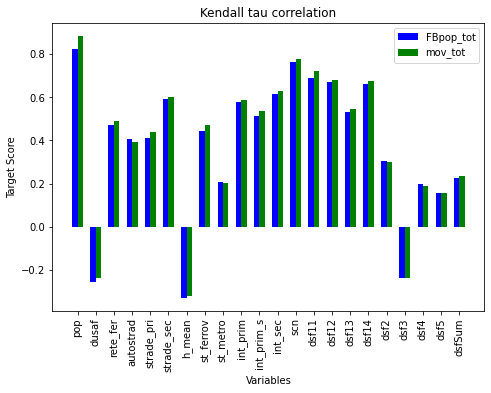

pop :  0.9718136583712809 0.975479047075337
dusaf :  0.515896817407276 0.5015892062910717
rete_fer :  0.5872702627378296 0.5920480752216741
autostrad :  0.47256382982309997 0.42682327956278565
strade_pri :  0.14487578172120918 0.12471372512137235
strade_sec :  0.6155671001666619 0.596746940766581
h_mean :  -0.24582551860637172 -0.22345213899684957
st_ferrov :  0.6431299789160242 0.6696329919435762
st_metro :  0.7358305038125518 0.7789904108214828
int_prim :  0.47653237668197906 0.43565162288622405
int_prim_s :  0.2354763869228885 0.20878922110442852
int_sec :  0.6347277956410862 0.6168323201205081
scn :  0.7805671148501395 0.7613133554084568
dsf11 :  0.7031655584530908 0.6907545491835813
dsf12 :  0.7944140741010243 0.7599048609252403
dsf13 :  0.3715555205083238 0.33872507154398934
dsf14 :  0.7943876223277776 0.7495313699747321
dsf2 :  0.020405519062262643 0.005610515874746114
dsf3 :  -0.22280800602420572 -0.2065457305807276
dsf4 :  -0.005193578163144578 -0.007707230974202486
dsf5 :  -0

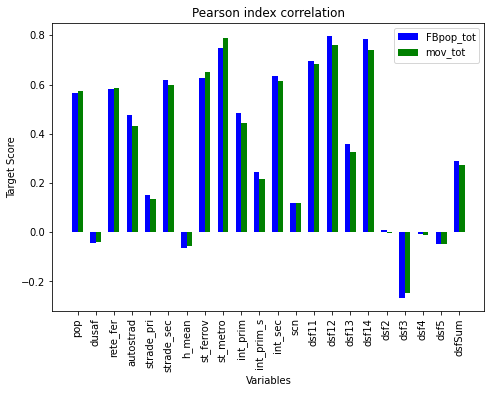

pop :  0.5650153479883055 0.5738369765424475
dusaf :  -0.043962393505153054 -0.039099509884241386
rete_fer :  0.5808498013078984 0.5851618986783532
autostrad :  0.4755374209936566 0.43335160316833343
strade_pri :  0.15191349357193146 0.13345994826113047
strade_sec :  0.6175785578271116 0.5979963682500771
h_mean :  -0.06300273945358788 -0.05641900675228718
st_ferrov :  0.6257967010581682 0.6496484449096878
st_metro :  0.7465314048292901 0.787200036628099
int_prim :  0.4852817043291752 0.44472806892719846
int_prim_s :  0.24433202395979775 0.21769714503684776
int_sec :  0.634117028047536 0.6146282847415596
scn :  0.1168426652537875 0.11749410249579409
dsf11 :  0.6966086081286441 0.6830593634259614
dsf12 :  0.7964991542799399 0.761155762133563
dsf13 :  0.3583154455064006 0.3255491650493139
dsf14 :  0.7843537661320941 0.7390418991462292
dsf2 :  0.0104852738930013 -0.004101057958111706
dsf3 :  -0.2672447323692174 -0.247516689714729
dsf4 :  -0.007021943338570098 -0.009919856063552055
dsf5 :  

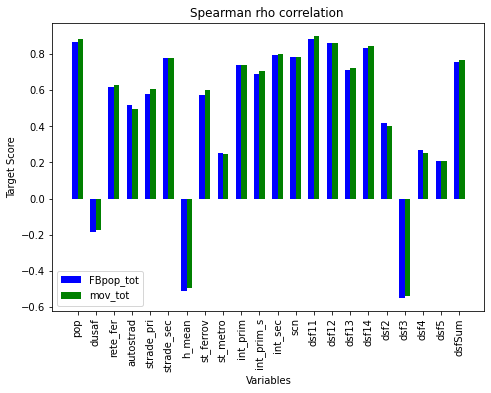

pop :  0.5650153479883055 0.5738369765424475
dusaf :  -0.043962393505153054 -0.039099509884241386
rete_fer :  0.5808498013078984 0.5851618986783532
autostrad :  0.4755374209936566 0.43335160316833343
strade_pri :  0.15191349357193146 0.13345994826113047
strade_sec :  0.6175785578271116 0.5979963682500771
h_mean :  -0.06300273945358788 -0.05641900675228718
st_ferrov :  0.6257967010581682 0.6496484449096878
st_metro :  0.7465314048292901 0.787200036628099
int_prim :  0.4852817043291752 0.44472806892719846
int_prim_s :  0.24433202395979775 0.21769714503684776
int_sec :  0.634117028047536 0.6146282847415596
scn :  0.1168426652537875 0.11749410249579409
dsf11 :  0.6966086081286441 0.6830593634259614
dsf12 :  0.7964991542799399 0.761155762133563
dsf13 :  0.3583154455064006 0.3255491650493139
dsf14 :  0.7843537661320941 0.7390418991462292
dsf2 :  0.0104852738930013 -0.004101057958111706
dsf3 :  -0.2672447323692174 -0.247516689714729
dsf4 :  -0.007021943338570098 -0.009919856063552055
dsf5 :  

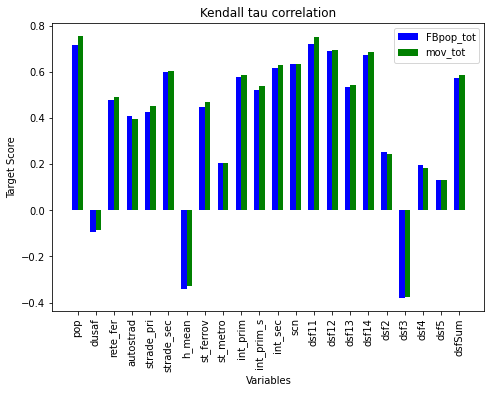

pop :  0.5650153479883055 0.5738369765424475
dusaf :  -0.043962393505153054 -0.039099509884241386
rete_fer :  0.5808498013078984 0.5851618986783532
autostrad :  0.4755374209936566 0.43335160316833343
strade_pri :  0.15191349357193146 0.13345994826113047
strade_sec :  0.6175785578271116 0.5979963682500771
h_mean :  -0.06300273945358788 -0.05641900675228718
st_ferrov :  0.6257967010581682 0.6496484449096878
st_metro :  0.7465314048292901 0.787200036628099
int_prim :  0.4852817043291752 0.44472806892719846
int_prim_s :  0.24433202395979775 0.21769714503684776
int_sec :  0.634117028047536 0.6146282847415596
scn :  0.1168426652537875 0.11749410249579409
dsf11 :  0.6966086081286441 0.6830593634259614
dsf12 :  0.7964991542799399 0.761155762133563
dsf13 :  0.3583154455064006 0.3255491650493139
dsf14 :  0.7843537661320941 0.7390418991462292
dsf2 :  0.0104852738930013 -0.004101057958111706
dsf3 :  -0.2672447323692174 -0.247516689714729
dsf4 :  -0.007021943338570098 -0.009919856063552055
dsf5 :  

In [6]:
pearson1 = []
spearman1 = []
kendall1 = []
pearson2 = []
spearman2 = []
kendall2 = []

for (columnName, columnData) in X.iteritems():
    pearson1.append(scipy.stats.pearsonr(columnData, y1)[0]) # Pearson index
    spearman1.append(scipy.stats.spearmanr(columnData, y1)[0])          # Spearman's rho
    kendall1.append(scipy.stats.kendalltau(columnData, y1)[0])         # Kendall's tau
    pearson2.append(scipy.stats.pearsonr(columnData, y2)[0]) # Pearson index
    spearman2.append(scipy.stats.spearmanr(columnData, y2)[0])          # Spearman's rho
    kendall2.append(scipy.stats.kendalltau(columnData, y2)[0])         # Kendall's tau


plot_dataP = pd.DataFrame({"FBpop_tot":pearson1,
                  "mov_tot":pearson2,
                  "target_variables": langs})

plot_dataS = pd.DataFrame({"FBpop_tot":spearman1,
                  "mov_tot":spearman2,
                  "target_variables": langs})
plot_dataK = pd.DataFrame({"FBpop_tot":kendall1,
                  "mov_tot":kendall2,
                  "target_variables": langs})


barPlot_func(plot_dataP.FBpop_tot, plot_dataP.mov_tot, plot_dataP.target_variables,'Pearson index correlation')
for i in range(len(langs)):
    print(langs[i], ': ', plot_dataP.FBpop_tot[i],plot_dataP.mov_tot[i])


barPlot_func(plot_dataS.FBpop_tot, plot_dataS.mov_tot, plot_dataS.target_variables,'Spearman rho correlation ')
for i in range(len(langs)):
    print(langs[i], ': ', plot_dataP.FBpop_tot[i],plot_dataP.mov_tot[i])

barPlot_func(plot_dataK.FBpop_tot, plot_dataK.mov_tot, plot_dataK.target_variables,'Kendall tau correlation')
for i in range(len(langs)):
    print(langs[i], ': ', plot_dataP.FBpop_tot[i],plot_dataP.mov_tot[i])




pearson1 = []
spearman1 = []
kendall1 = []
pearson2 = []
spearman2 = []
kendall2 = []

for (columnName, columnData) in a.iteritems():
    pearson1.append(scipy.stats.pearsonr(columnData, y1)[0]) # Pearson index
    spearman1.append(scipy.stats.spearmanr(columnData, y1)[0])          # Spearman's rho
    kendall1.append(scipy.stats.kendalltau(columnData, y1)[0])         # Kendall's tau
    pearson2.append(scipy.stats.pearsonr(columnData, y2)[0]) # Pearson index
    spearman2.append(scipy.stats.spearmanr(columnData, y2)[0])          # Spearman's rho
    kendall2.append(scipy.stats.kendalltau(columnData, y2)[0])         # Kendall's tau


plot_dataP = pd.DataFrame({"FBpop_tot":pearson1,
                  "mov_tot":pearson2,
                  "target_variables": langs})

plot_dataS = pd.DataFrame({"FBpop_tot":spearman1,
                  "mov_tot":spearman2,
                  "target_variables": langs})
plot_dataK = pd.DataFrame({"FBpop_tot":kendall1,
                  "mov_tot":kendall2,
                  "target_variables": langs})


barPlot_func(plot_dataP.FBpop_tot, plot_dataP.mov_tot, plot_dataP.target_variables,'Pearson index correlation')
for i in range(len(langs)):
    print(langs[i], ': ', plot_dataP.FBpop_tot[i],plot_dataP.mov_tot[i])


barPlot_func(plot_dataS.FBpop_tot, plot_dataS.mov_tot, plot_dataS.target_variables,'Spearman rho correlation ')
for i in range(len(langs)):
    print(langs[i], ': ', plot_dataP.FBpop_tot[i],plot_dataP.mov_tot[i])

barPlot_func(plot_dataK.FBpop_tot, plot_dataK.mov_tot, plot_dataK.target_variables,'Kendall tau correlation')
for i in range(len(langs)):
    print(langs[i], ': ', plot_dataP.FBpop_tot[i],plot_dataP.mov_tot[i])






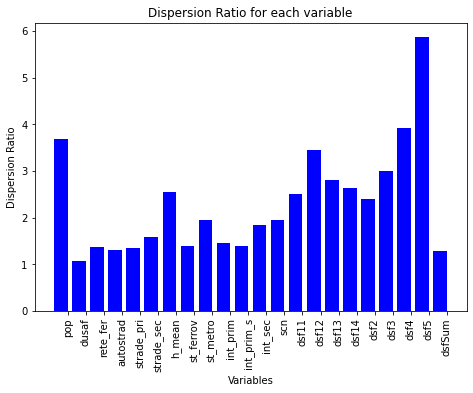

pop :  3.696779482494393
dusaf :  1.0777593900319926
rete_fer :  1.3740042429602914
autostrad :  1.2981032292376529
strade_pri :  1.3522066189992477
strade_sec :  1.5934719330784206
h_mean :  2.5542761802424105
st_ferrov :  1.3989649368289228
st_metro :  1.9504672397143112
int_prim :  1.4619346330873462
int_prim_s :  1.398323685565564
int_sec :  1.8495404313533361
scn :  1.9468508930447788
dsf11 :  2.5014404783036013
dsf12 :  3.455167254983982
dsf13 :  2.8160609798639293
dsf14 :  2.6346223440665315
dsf2 :  2.400532517748114
dsf3 :  3.0064792805664164
dsf4 :  3.920049367563896
dsf5 :  5.877780223438848
dsfSum :  1.2844531598734


In [7]:
dispersion_ratio = []

for (columnName, columnData) in X.iteritems():
    x_new = [i for i in columnData if i != 0]
    dispersion_ratio.append(statistics.mean(x_new)/gmean(x_new))

barPlot_func_onedata(dispersion_ratio, langs,'Dispersion Ratio for each variable')

for i in range(len(langs)):
    print(langs[i], ': ', dispersion_ratio[i])

pop :  0.62912
dusaf :  0.00032
rete_fer :  0.00741
autostrad :  0.00531
strade_pri :  0.01524
strade_sec :  0.00186
h_mean :  0.00856
st_ferrov :  0.02020
st_metro :  0.04470
int_prim :  0.00408
int_prim_s :  0.00491
int_sec :  0.00263
scn :  0.03142
dsf11 :  0.00431
dsf12 :  0.03893
dsf13 :  0.00285
dsf14 :  0.16167
dsf2 :  0.00568
dsf3 :  0.00536
dsf4 :  0.00211
dsf5 :  0.00289
dsfSum :  0.00043


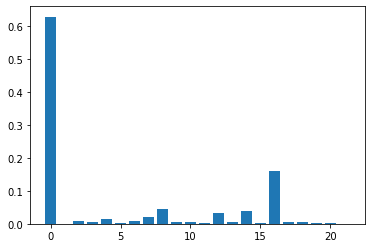



pop :  0.73498
dusaf :  0.00008
rete_fer :  0.01227
autostrad :  0.00421
strade_pri :  0.00837
strade_sec :  0.00993
h_mean :  0.00703
st_ferrov :  0.02480
st_metro :  0.04121
int_prim :  0.00484
int_prim_s :  0.01107
int_sec :  0.01466
scn :  0.05006
dsf11 :  0.01298
dsf12 :  0.00535
dsf13 :  0.00341
dsf14 :  0.03526
dsf2 :  0.00918
dsf3 :  0.00248
dsf4 :  0.00236
dsf5 :  0.00511
dsfSum :  0.00035


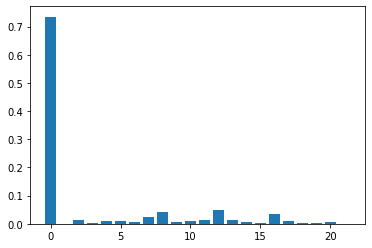

pop :  0.06487
dusaf :  0.00067
rete_fer :  0.00379
autostrad :  0.00588
strade_pri :  0.01608
strade_sec :  0.00664
h_mean :  0.00426
st_ferrov :  0.00536
st_metro :  0.15121
int_prim :  0.00274
int_prim_s :  0.01253
int_sec :  0.00958
scn :  0.01175
dsf11 :  0.06071
dsf12 :  0.20134
dsf13 :  0.00262
dsf14 :  0.41072
dsf2 :  0.00600
dsf3 :  0.00586
dsf4 :  0.00427
dsf5 :  0.00559
dsfSum :  0.00753


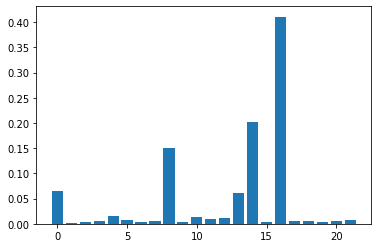



pop :  0.09609
dusaf :  0.00098
rete_fer :  0.02675
autostrad :  0.00476
strade_pri :  0.00846
strade_sec :  0.00937
h_mean :  0.00612
st_ferrov :  0.01511
st_metro :  0.15076
int_prim :  0.00215
int_prim_s :  0.00940
int_sec :  0.01917
scn :  0.01787
dsf11 :  0.10453
dsf12 :  0.16308
dsf13 :  0.00278
dsf14 :  0.33391
dsf2 :  0.00256
dsf3 :  0.01280
dsf4 :  0.00146
dsf5 :  0.00826
dsfSum :  0.00361


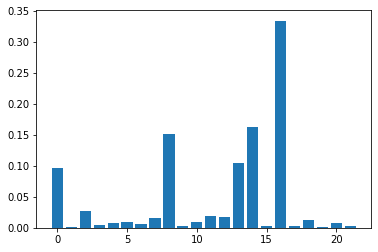

In [8]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
# define the model
model1 = RandomForestRegressor()
model2 = RandomForestRegressor()

# fit the model
model1.fit(X, y1)
model2.fit(X, y2)

# get importance
importance = model1.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print(langs[i], ': ', '%.5f' % (v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

importance = model2.feature_importances_

print('\n')
for i,v in enumerate(importance):
    print(langs[i], ': ', '%.5f' % (v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()



# fit the model
model1.fit(a, y1)
model2.fit(a, y2)

# get importance
importance = model1.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print(langs[i], ': ', '%.5f' % (v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

importance = model2.feature_importances_

print('\n')
for i,v in enumerate(importance):
    print(langs[i], ': ', '%.5f' % (v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance, label='prova')
pyplot.show()
